In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('lstm.csv')
df.head()

,Unnamed: 0,image-number,x-coord pix,y-coord pix,bbox-width pix,bbox-height pix,tilt-direction pix,x-coord dist,y-coord dist,z-coord dist,tilt-direction dist,timestamp
0,0,1,386.5,274.0,195,122,-1,-12,-11,14,0,1.658866e+09
1,1,2,383.5,273.5,183,119,-1,-12,-11,17,0,1.658866e+09
2,2,3,386.5,267.0,177,128,-1,-11,-11,9,-22,1.658866e+09
3,3,4,398.0,256.5,172,127,-1,-10,-12,10,-25,1.658866e+09
4,4,5,416.5,246.0,169,124,-1,-8,-14,12,-24,1.658866e+09


In [4]:
df = df[['x-coord pix', 'y-coord pix','bbox-width pix', 'bbox-height pix']]
df

,x-coord pix,y-coord pix,bbox-width pix,bbox-height pix
0,386.5,274.0,195,122
1,383.5,273.5,183,119
2,386.5,267.0,177,128
3,398.0,256.5,172,127
4,416.5,246.0,169,124
...,...,...,...,...
1034,399.0,328.5,176,133
1035,407.5,342.0,181,136
1036,425.5,361.5,179,137
1037,439.0,372.0,182,108


<AxesSubplot:>

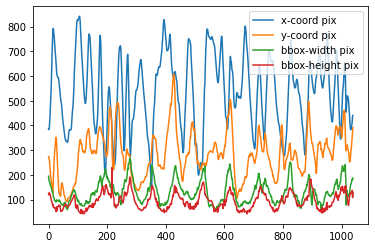

In [5]:
df.plot()

In [6]:
len(df)

1039

In [7]:
dfnp = df.to_numpy()

In [8]:
dfnp[:,(0,2)] /= 960
dfnp[:,(1,3)] /= 720

In [9]:
dfnp

array([[0.40260417, 0.38055556, 0.203125  , 0.16944444],
       [0.39947917, 0.37986111, 0.190625  , 0.16527778],
       [0.40260417, 0.37083333, 0.184375  , 0.17777778],
       ...,
       [0.44322917, 0.50208333, 0.18645833, 0.19027778],
       [0.45729167, 0.51666667, 0.18958333, 0.15      ],
       [0.45885417, 0.54375   , 0.19479167, 0.17916667]])

In [10]:
train = dfnp[:850]
test = dfnp[850:]

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_inputs = 6
n_features = 4
generator = TimeseriesGenerator(data=train, targets=train, length=n_inputs,batch_size=1)

In [12]:
X, y = generator[0]
X.shape

(1, 6, 4)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(70, activation='relu', input_shape=(n_inputs, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
model.summary()

ValueError: Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 100)

In [69]:
model.fit(generator, epochs=50)

Epoch 1/50


2022-07-27 12:22:36.483099: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-27 12:22:38.576610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - 49s 53ms/step - loss: 0.0050
Epoch 2/50
844/844 [==============================] - 51s 61ms/step - loss: 0.0017
Epoch 3/50
844/844 [==============================] - 47s 55ms/step - loss: 0.0012
Epoch 4/50
844/844 [==============================] - 45s 53ms/step - loss: 7.1670e-04
Epoch 5/50
844/844 [==============================] - 42s 50ms/step - loss: 5.4804e-04
Epoch 6/50
844/844 [==============================] - 44s 53ms/step - loss: 4.2780e-04
Epoch 7/50
844/844 [==============================] - 45s 53ms/step - loss: 3.7964e-04
Epoch 8/50
844/844 [==============================] - 43s 51ms/step - loss: 3.1399e-04
Epoch 9/50
844/844 [==============================] - 42s 49ms/step - loss: 2.9711e-04
Epoch 10/50
844/844 [==============================] - 37s 44ms/step - loss: 2.5368e-04
Epoch 11/50
844/844 [==============================] - 36s 43ms/step - loss: 2.3414e-04
Epoch 12/50
844/844 [==============================] - 34s 41ms/

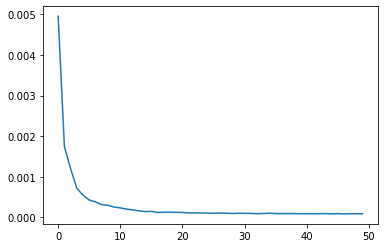

In [70]:
loss_per_ep = model.history.history['loss']
plt.plot(range(len(loss_per_ep)),loss_per_ep)

In [71]:
last_train_batch = train[-n_inputs:].reshape((1,n_inputs, n_features))

In [72]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 898ms/step


2022-07-27 12:59:20.908626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.5951    , 0.35570192, 0.10066469, 0.09661353]], dtype=float32)

In [97]:
pred = []
current_batch = last_train_batch
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[test[i]]], axis=1)

1/1 [==============================] - 0s 18ms/step


In [98]:
test_predictions = np.array(pred)
test_predictions

array([[0.5951    , 0.35570192, 0.10066469, 0.09661353],
       [0.57506585, 0.32535213, 0.09063323, 0.09076053],
       [0.56689715, 0.3187184 , 0.08886738, 0.09263048],
       [0.5573624 , 0.3167987 , 0.0914313 , 0.09589406],
       [0.5496248 , 0.31408614, 0.098278  , 0.10356192],
       [0.54874784, 0.31679922, 0.09061186, 0.10018396],
       [0.5470254 , 0.31827033, 0.0891896 , 0.09726872],
       [0.54157555, 0.3174343 , 0.08346914, 0.09700559],
       [0.5276985 , 0.31209594, 0.07695893, 0.09634203],
       [0.51229304, 0.30813193, 0.06836163, 0.09284642],
       [0.5012842 , 0.2958971 , 0.06932519, 0.092538  ],
       [0.49735636, 0.29186815, 0.07249647, 0.09188538],
       [0.4891951 , 0.29677886, 0.06774379, 0.09146878],
       [0.47076875, 0.28985345, 0.0753006 , 0.09112991],
       [0.4495738 , 0.27832457, 0.07981312, 0.09413538],
       [0.4299783 , 0.271507  , 0.08844537, 0.09735765],
       [0.41150367, 0.26873365, 0.10272628, 0.10301633],
       [0.4079672 , 0.2781461 ,

In [99]:
test_predictions[:,(0,2)] *= 960
test_predictions[:,(1,3)] *= 720
test_cp = test.copy()
test_cp[:,(0,2)] *= 960
test_cp[:,(1,3)] *= 720

In [100]:
test_predictions,test_cp

(array([[571.29596 , 256.10538 ,  96.6381  ,  69.56174 ],
        [552.06323 , 234.25354 ,  87.0079  ,  65.34758 ],
        [544.22125 , 229.47725 ,  85.31268 ,  66.69394 ],
        [535.0679  , 228.09506 ,  87.774055,  69.043724],
        [527.63983 , 226.14201 ,  94.34688 ,  74.56458 ],
        [526.7979  , 228.09544 ,  86.98739 ,  72.13245 ],
        [525.14435 , 229.15463 ,  85.62202 ,  70.03348 ],
        [519.91254 , 228.5527  ,  80.13037 ,  69.844025],
        [506.59058 , 224.70908 ,  73.88058 ,  69.366264],
        [491.80133 , 221.855   ,  65.62716 ,  66.84943 ],
        [481.23282 , 213.04591 ,  66.552185,  66.62736 ],
        [477.4621  , 210.14507 ,  69.59661 ,  66.15747 ],
        [469.62732 , 213.68077 ,  65.03404 ,  65.85752 ],
        [451.938   , 208.69449 ,  72.28858 ,  65.61354 ],
        [431.59085 , 200.39369 ,  76.62059 ,  67.77747 ],
        [412.77917 , 195.48503 ,  84.907555,  70.09751 ],
        [395.04352 , 193.48824 ,  98.61723 ,  74.17176 ],
        [391.6

In [102]:
plot = pd.DataFrame(np.hstack((test_cp, test_predictions)), columns=['x','y','w','h','px','py','pw','ph'])
plot

,x,y,w,h,px,py,pw,ph
0,565.0,240.0,92.0,72.0,571.295959,256.105377,96.638100,69.561737
1,552.5,233.0,89.0,74.0,552.063232,234.253540,87.007896,65.347580
2,542.5,228.5,89.0,75.0,544.221252,229.477249,85.312683,66.693939
3,533.5,226.5,95.0,81.0,535.067871,228.095062,87.774055,69.043724
4,529.5,224.5,87.0,77.0,527.639832,226.142014,94.346878,74.564583
...,...,...,...,...,...,...,...,...
184,399.0,328.5,176.0,133.0,402.993835,325.197937,170.254456,122.243874
185,407.5,342.0,181.0,136.0,408.879883,342.693665,178.372772,128.719849
186,425.5,361.5,179.0,137.0,418.941925,358.079742,182.441589,130.624420
187,439.0,372.0,182.0,108.0,446.546234,383.991302,179.502487,130.432999


<AxesSubplot:>

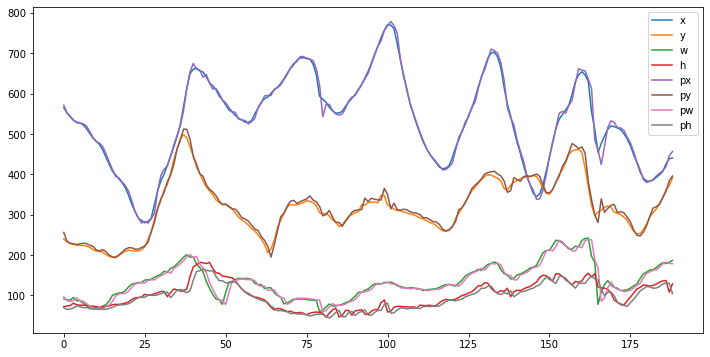

In [103]:
plot.plot(figsize=(12,6))

In [105]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(test_cp, test_predictions)
print(rmse)

96.4319879680112


In [106]:
model.save('ep50lstm100relu')

INFO:tensorflow:Assets written to: ep50lstm100relu/assets


In [107]:
'''
LOG:
Epoch 50, LSTM(100), relu : 96.438
Epoch 50, LSTM(100), tanh : 104.421

'''

'\nLOG:\nEpoch 50, LSTM(100), relu : 96.438\nEpoch 50, LSTM(100), tanh : 104.421\n\n'